In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [80]:
# Import average motor (outputs and labels) and loss values
# for each data moment. When validating on
# networks trained for 6 epochs on direct vs.
# direct + follow data. Validation set is 
# only direct mode data.

directfollow = pd.read_csv('df.csv')
direct = pd.read_csv('d.csv')
print(direct.head(2))
print(directfollow.head(2))

     Output    Labels      Loss
0  0.555022  0.545455  0.000203
1  0.588095  0.583281  0.000354
     Output    Labels      Loss
0  0.597936  0.586096  0.004172
1  0.557979  0.547251  0.000410


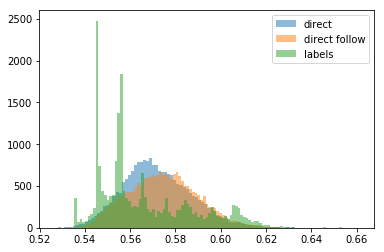

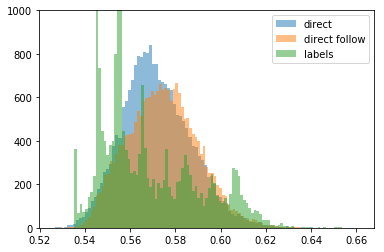

In [75]:
# Find histograms of motor outputs of the network
bins = 100

plt.hist(direct['Output'], bins, alpha=0.5, label='direct')
plt.hist(directfollow['Output'], bins, alpha=0.5, label='direct follow')
plt.hist(direct['Labels'], bins, alpha=0.5, label='labels')
plt.legend()
plt.show()

plt.hist(direct['Output'], bins, alpha=0.5, label='direct')
plt.hist(directfollow['Output'], bins, alpha=0.5, label='direct follow')
plt.hist(direct['Labels'], bins, alpha=0.5, label='labels')
plt.ylim(0,1000)
plt.legend()
plt.show()

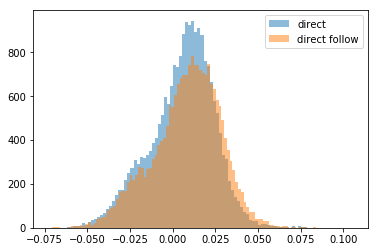

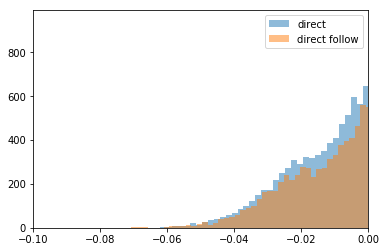

In [81]:
# Find histogram of relative output to labels
# Find undershooting/overshooting
# Find histograms of outputs of the network
bins = 100

plt.hist(direct['Output'] - direct['Labels'], bins, alpha=0.5, label='direct')
plt.hist(directfollow['Output'] - directfollow['Labels'], bins, alpha=0.5, label='direct follow')
plt.legend()
plt.show()

# Let's just look at undershooting
plt.xlim(-0.1,0)
plt.hist(direct['Output'] - direct['Labels'], bins, alpha=0.5, label='direct')
plt.hist(directfollow['Output'] - directfollow['Labels'], bins, alpha=0.5, label='direct follow')
plt.legend()
plt.show()

0.00799158444139


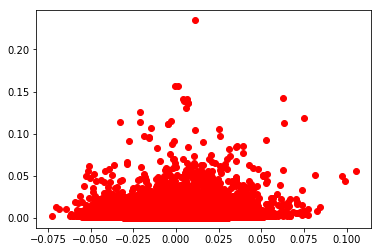

0.0782282281778


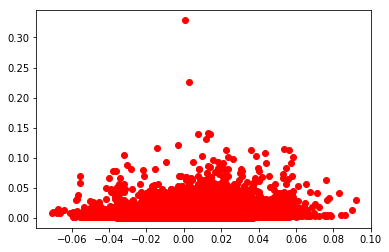

In [94]:
# Is the over or undershooting related to loss?
# Calculate correlation constant to see
# Is the speed a "confidence metric" of the network?

plt.plot(direct['Output'] - direct['Labels'], direct['Loss'], 'ro')
print(stats.linregress(direct['Output'] - direct['Labels'], direct['Loss']).rvalue)
plt.show()

plt.plot(directfollow['Output'] - directfollow['Labels'], directfollow['Loss'], 'ro')
print(stats.linregress(directfollow['Output'] - directfollow['Labels'], directfollow['Loss']).rvalue)
plt.show()

0.084940818974


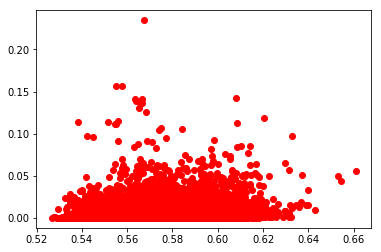

0.132474128687


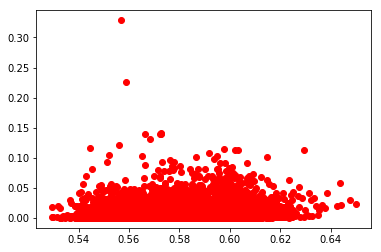

In [96]:
# Same experiment with exact motor vals rather than relative to labels

plt.plot(direct['Output'], direct['Loss'], 'ro')
print(stats.linregress(direct['Output'], direct['Loss']).rvalue)
plt.show()

plt.plot(directfollow['Output'], directfollow['Loss'], 'ro')
print(stats.linregress(directfollow['Output'], directfollow['Loss']).rvalue)
plt.show()